In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Data

In [50]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))])
trainset = torchvision.datasets.FashionMNIST(root='Data',
                                             train=True,
                                             download=True,
                                             transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=1024,
                                          num_workers=10,
                                          shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='Data',
                                            train=False,
                                            download=True,
                                            transform=transform)
testloader = torch.utils.data.DataLoader(testset,
                                               batch_size=1024,
                                               num_workers=10,
                                               shuffle=False)

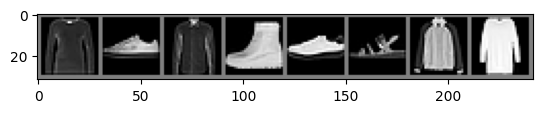

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img/2.0 + 0.5 # Convert image origin
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

# Model

In [52]:
model = nn.Sequential(
    nn.Flatten(),
    nn.Linear(784, 10)
)
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [53]:
#Generating a random tensor
input_tensor = torch.rand(5, 28, 28)

# Feeding the tensor into the model
output = model(input_tensor)
output.shape

torch.Size([5, 10])

# Loss, Optimizer and Evaluate Function

In [54]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),
                      lr = 0.01)

In [55]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, loss_fn):
    model.eval()
    test_loss = 0.0
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            test_loss = test_loss + loss

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct/total * 100
    test_loss = test_loss / len(testloader)
    return accuracy, test_loss



In [56]:
test_accuracy, test_loss = evaluate(model, testloader, loss_fn)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 2.3688416481018066
test_accuracy: 8.52


# Train

In [57]:
#Some parameters
train_losses = []
train_accuracies = []

test_losses = []
test_accuracies = []

max_epoch = 20

In [58]:
#Train
for epoch in range(max_epoch):
    runing_loss = 0.0
    runing_correct = 0.0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):

        #zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        runing_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        runing_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    epoch_accuracy = runing_correct / total * 100
    train_accuracies.append(epoch_accuracy)
    epoch_loss = runing_loss / (i+1)
    train_losses.append(epoch_loss)
    test_accuracy, test_loss = evaluate(model, testloader, loss_fn)
    test_accuracies.append(test_accuracy)
    test_losses.append(test_loss)

    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    

Epoch [1/20], Loss: 1.3332, Accuracy: 62.42%, Test Loss: 0.9696, Test Accuracy: 71.12%
Epoch [2/20], Loss: 0.8662, Accuracy: 73.57%, Test Loss: 0.8089, Test Accuracy: 74.20%
Epoch [3/20], Loss: 0.7590, Accuracy: 75.48%, Test Loss: 0.7401, Test Accuracy: 75.30%
Epoch [4/20], Loss: 0.7052, Accuracy: 76.78%, Test Loss: 0.6993, Test Accuracy: 76.50%
Epoch [5/20], Loss: 0.6701, Accuracy: 77.74%, Test Loss: 0.6714, Test Accuracy: 77.19%
Epoch [6/20], Loss: 0.6452, Accuracy: 78.38%, Test Loss: 0.6503, Test Accuracy: 77.91%
Epoch [7/20], Loss: 0.6255, Accuracy: 78.95%, Test Loss: 0.6340, Test Accuracy: 78.41%
Epoch [8/20], Loss: 0.6099, Accuracy: 79.42%, Test Loss: 0.6209, Test Accuracy: 78.78%
Epoch [9/20], Loss: 0.5968, Accuracy: 79.81%, Test Loss: 0.6096, Test Accuracy: 79.29%
Epoch [10/20], Loss: 0.5861, Accuracy: 80.15%, Test Loss: 0.6002, Test Accuracy: 79.53%
Epoch [11/20], Loss: 0.5771, Accuracy: 80.43%, Test Loss: 0.5920, Test Accuracy: 79.83%
Epoch [12/20], Loss: 0.5684, Accuracy: 80

In [59]:
train_losses

[1.3331686925079862,
 0.8662154361353083,
 0.7590029219449577,
 0.7052316493907217,
 0.6700753135196234,
 0.6452430436166666,
 0.6254883347931555,
 0.6099197975659775,
 0.5967802203307717,
 0.5860524763495235,
 0.5771341940103951,
 0.5684474898596942,
 0.5609571155855211,
 0.5544692934569666,
 0.5483746983237185,
 0.5432718067856158,
 0.5381075381222418,
 0.5337351666668714,
 0.529430800575321,
 0.52597985075692]

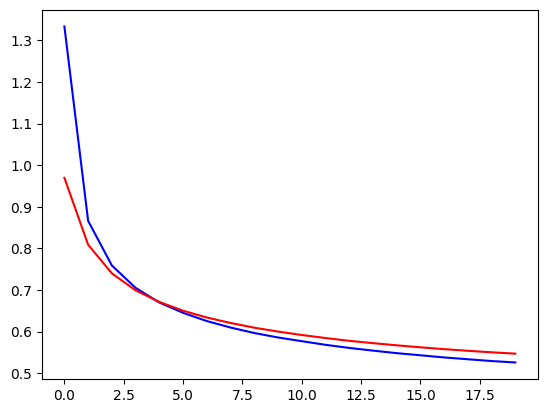

In [60]:
import matplotlib.pyplot as plt 

plt.plot(train_losses,'b')
plt.plot(test_losses,'r')
plt.show()

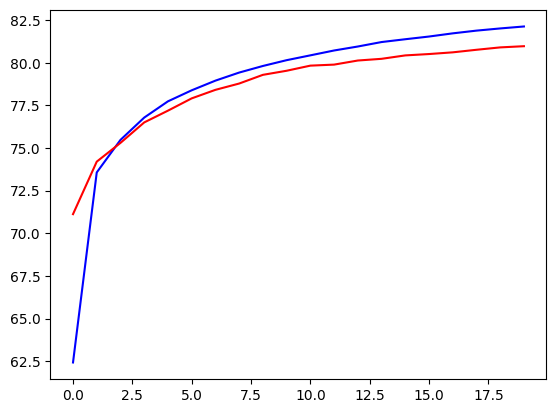

In [61]:
import matplotlib.pyplot as plt 

plt.plot(train_accuracies,'b')
plt.plot(test_accuracies,'r')
plt.show()